# 5.1 Конечно-разностная формула на произвольном шаблоне

Миллер Владимир (696а)

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Функция вычисления

In [24]:
def calculate(xs, fs, x0, k):
    xs = np.array(xs, dtype=np.float64)
    fs = np.array(fs, dtype=np.float64)
    assert k >= 1
    assert xs.min() <= x0 <= xs.max()
    
    # Вычисляем, ближе к какой стороне находится точка х0.
    # Для вычисления производной в точке используем значение функции:
    #     isLeft is True <=> в следующей точке
    #     isLeft is False <=> в предыдущей точке
    isLeft = ([i for i in range(len(xs)) if xs[i] >= x0][0] + 1) * 2 <= len(xs) + 1
    
    # Вычисляем номер отрезка, в котором находится х0.
    segmentK = max([i for i in range(len(xs)) if xs[i] >= x0][0] - 1, 0)
    
    if (isLeft):
        assert segmentK < (len(xs) - 1 - k)
    else:
        assert segmentK > k - 1
    
    # Вычисление a:
    # a[i] - набор коэффициентов при fs для аппроксимации производной в точке xs[i].
    a = np.identity(len(xs), dtype=np.float64)
    for k_ in range(1, k+1):
        if (isLeft):
            for i in range(len(xs) - k_):
                a[i] = (a[i+1] - a[i]) / (xs[i+1] - xs[i])
        else:
            for i in reversed(range(k_, len(xs))):
                a[i] = (a[i] - a[i-1]) / (xs[i] - xs[i-1]) 
        
    a0 = a[segmentK] + (a[segmentK+1] - a[segmentK]) * (x0 - xs[segmentK]) / (xs[segmentK+1] - xs[segmentK])
    f0 = np.dot(a0, fs)
    
    return a0, f0

## Тест

In [49]:
def irregular_grid(xl, xr, n):
    r = np.random.rand(n-2) * (xr - xl) + xl
    return np.array([xl] + sorted(list(r)) + [xr], dtype=np.float64)

In [66]:
def plot(fp, xs, fs, k, figsize):
    grid = np.linspace(xs.min(), xs.max(), 512)
    fp_ex = fp(grid)
    fp_ex_min = fp_ex.min()
    fp_ex_max = fp_ex.max()
    ylim_bottom = fp_ex_min - (fp_ex_max - fp_ex_min) / 16
    ylim_top = fp_ex_max + (fp_ex_max - fp_ex_min) / 16
    
    fp_ap = []
    for x0 in grid:
        a0, f0 = calculate(xs, fs, x0, k)
        fp_ap.append(f0)
    
    fig, ax1 = plt.subplots(1, 1, figsize=figsize)
    plt.ylim(bottom=ylim_bottom, top=ylim_top)
    ax1.plot(grid, fp_ap, label="approximate")
    for x in xs:
        ax1.axvline(x=x, linewidth=1, color='grey', linestyle="--")
    ax1.plot(grid, fp_ex, 'k-', label="actual")
    ax1.legend()

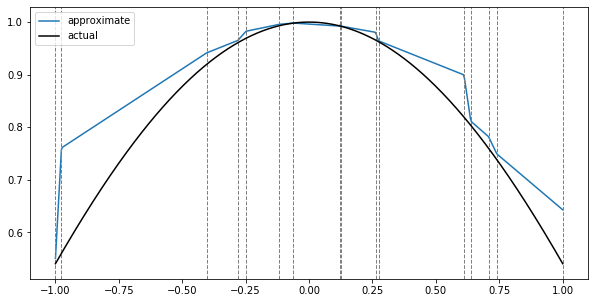

In [67]:
f = lambda x: np.sin(x)
fp = lambda x: np.cos(x)

xs = irregular_grid(-1, 1, 16)
fs = f(xs)
k = 1
plot(fp, xs, fs, k, (10, 5))

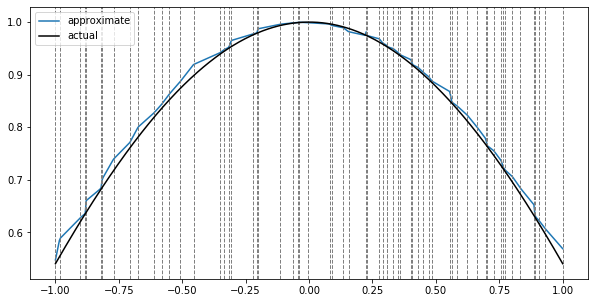

In [68]:
f = lambda x: np.sin(x)
fp = lambda x: np.cos(x)

xs = irregular_grid(-1, 1, 64)
fs = f(xs)
k = 1
plot(fp, xs, fs, k, (10, 5))

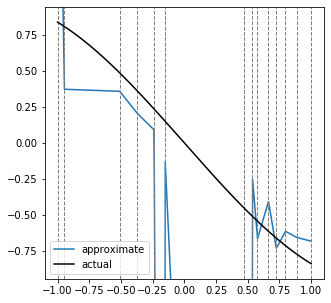

In [69]:
f = lambda x: np.sin(x)
fp = lambda x: -np.sin(x)

xs = irregular_grid(-1, 1, 16)
fs = f(xs)
k = 2
plot(fp, xs, fs, k, (5, 5))

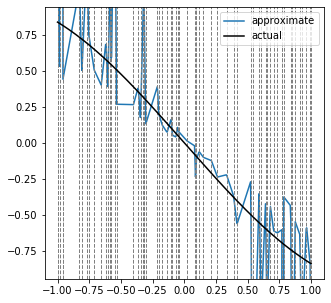

In [73]:
f = lambda x: np.sin(x)
fp = lambda x: -np.sin(x)

xs = irregular_grid(-1, 1, 64)
fs = f(xs)
k = 2
plot(fp, xs, fs, k, (5, 5))

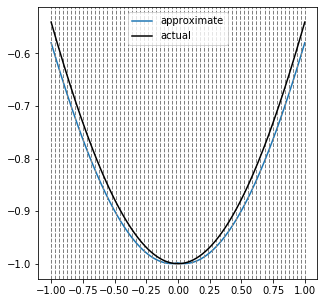

In [112]:
f = lambda x: np.sin(x)
fp = lambda x: -np.cos(x)

xs = np.linspace(-1, 1, 64)
fs = f(xs)
k = 3
plot(fp, xs, fs, k, (5, 5))

## Тест (ошибка)

In [101]:
def plot_error(history_d, history_err):
    history_d = np.array(history_d, dtype=np.float64)
    history_err = np.array(history_err, dtype=np.float64)
    fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
    ax1.loglog(history_d, history_err, label="error")
    ax1.loglog([history_d.min(), history_d.max()], [history_err.min(), k * history_d.max()], label="k")
    ax1.legend()

In [130]:
def calculate_error(f, fp, k, STEPS, D0, xl, xr, x0):
    d = D0
    history_d = []
    history_err = []
    for i in range(STEPS):
        # Generating grid.
        xs = [x0 - d]
        while xs[-1] - 2*d >= xl:
            xs.append(xs[-1] - 2*d)
        xs.append(x0 + d)
        while xs[-1] + 2*d <= xr:
            xs.append(xs[-1] + 2*d)
        xs = np.array(sorted(xs))

        history_d.append(d)
        a0, f0 = calculate(xs, f(xs), x0, k)
        history_err.append(np.abs(fp(x0) - f0))

        d /= 2
    return history_d, history_err

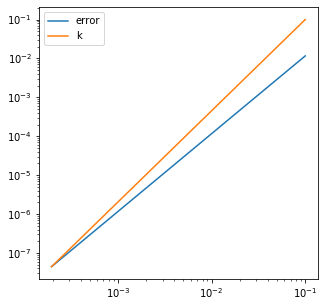

In [131]:
f = lambda x: np.sin(x)
fp = lambda x: np.cos(x)
k = 1
STEPS = 10
D0 = 0.1
xl, xr = -1.0, 1.0
x0 = (xl + xr) / 2

hd, herr = calculate_error(f, fp, k, STEPS, D0, xl, xr, x0)
plot_error(hd, herr)

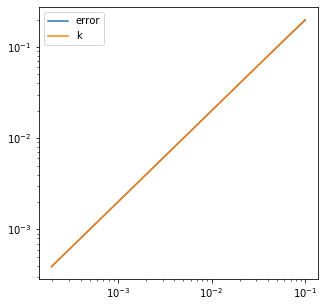

In [132]:
f = lambda x: np.sin(x)
fp = lambda x: -np.sin(x)
k = 2
STEPS = 10
D0 = 0.1
xl, xr = -1.0, 1.0
x0 = (xl + xr) / 2

hd, herr = calculate_error(f, fp, k, STEPS, D0, xl, xr, x0)
plot_error(hd, herr)

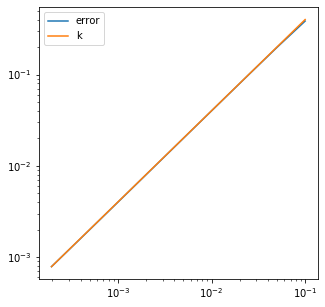

In [133]:
f = lambda x: np.sin(x)
fp = lambda x: np.sin(x)
k = 4
STEPS = 10
D0 = 0.1
xl, xr = -1.0, 1.0
x0 = (xl + xr) / 2

hd, herr = calculate_error(f, fp, k, STEPS, D0, xl, xr, x0)
plot_error(hd, herr)